# Exercise on Regression

## Exercise 2: Gradient Descent

This exercise aims to serve as an introduction to Gradient Descent algorthims and nonlinear Regression

We aim to find the minimum of a function: f(x,y) = sin(x)*cos(y).


In [1]:
import numpy as np
import matplotlib.pyplot as plt


#### Visualization
Let's visualize the function we aim to minimize

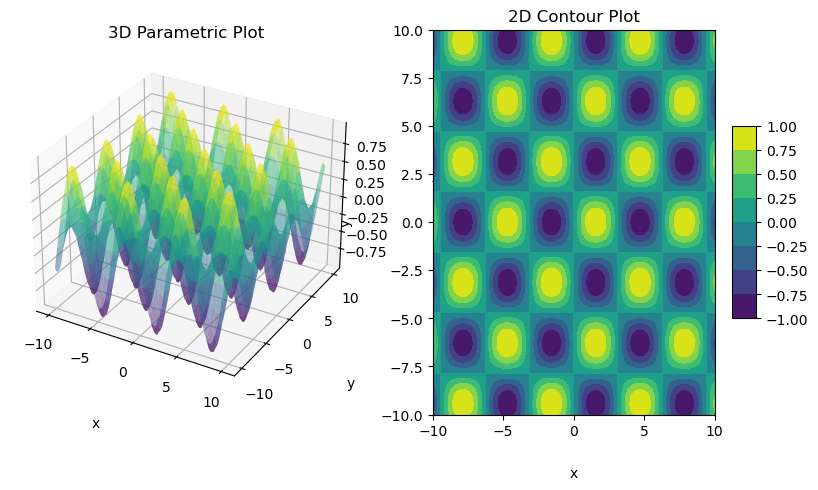

In [2]:
x= np.linspace(-10, 10, 1000)
y= np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x, y)

Z = np.sin(X) *np.cos(Y)

# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot

ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

#### Define the function to be minimized and its gradient:
 - function`f(indepvar)`:
     - input : `indepvar` = array of (2,) $\boldsymbol{x} = [x,y]$
     - output: `z` = array of (1,)
 - function`grad_f(indepvar)`:
     - input : `indepvar` = array of (2,) $\boldsymbol{x} = [x,y]$
     - output: `grad` = array of (???)

In [3]:
# Define the function to be minimized:
def f(indepvar):
    x = indepvar[0]; y = indepvar[1]
    z = np.sin(x) * np.cos(y)
    return z

# Define the partial derivatives of the function with respect to x and y
def grad_f(indepvar):
    grad = np.zeros((2,))
    x = indepvar[0]; y = indepvar[1]
    grad[0] =  np.cos(x) * np.cos(y)  # df_dx
    grad[1] =  -np.sin(x) * np.sin(y) # df_dy
    return grad


#### Gradient descent:

To perform the gradient descent, we are going to create a function that:
- Inputs:
    - The starting point:`start_indepvar`
    - The learning rate : `learning_rate`
    - The number of iterations : `num_iterations`

- The function iterates until arriving convergence. Each iteration:
   - Calculate the function value $\boldsymbol{z}_k = f(\boldsymbol{x}_k)$
   - Calculate next point as $\boldsymbol{x}_{k+1} = \boldsymbol{x}_k - \delta* \nabla f(\boldsymbol{x}_k)$
   - Check convergence :  $|f(\boldsymbol{x}_{k+1} - f(\boldsymbol{x}_k)|< \epsilon$
   - Save the solution : `history`

In [4]:
# Define the gradient descent algorithm
def gradient_descent(start_indepvar, learning_rate, num_iterations):

    # Initialize values
    indepvar0 = start_indepvar
    z0        = f(indepvar0)
    
    #Parameters
    epsilon = 0.001
    history = np.zeros((num_iterations, 3) )
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        grad = grad_f(indepvar0)
        
        # Update values
        indepvar = indepvar0 - learning_rate * grad
        z        = f(indepvar)
        
        # Save the history of the parameters
        history[i,:]=  np.append(indepvar,z)
        
        # Check convergence 
        if (abs(z-z0)<epsilon ):
            #reshape history and break
            history = history[:i,:]
            break
        else:
            # reinitialize state 0:
            indepvar0 = indepvar; z0=z
    print(f'Last iteration n= {i+1}, abs(z-z0)= {abs(z-z0)}')
    return indepvar, z, history


Perform gradient descent and plot the results

Last iteration n= 29, abs(z-z0)= 0.0008656245808136287


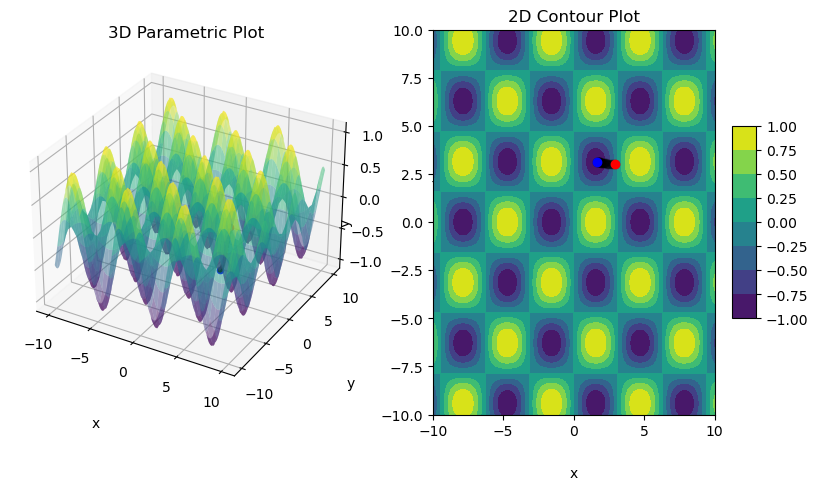

In [5]:
# Perform gradient descent and plot the results
start_xy = [3, 3]
learning_rate = 0.1
num_iterations = 100
indepvar_opt, f_opt, history = gradient_descent(start_xy, learning_rate, num_iterations)



# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')
ax.scatter(*zip(*history), c='k', marker='o', s=5)
ax.scatter(*history[0], c='r', marker='o')
ax.scatter(*history[len(history)-1], c='b', marker='o')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot

ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= history.shape[0]

for it in range(nit-1):
    plt.scatter(history[it,0], history[it,1], c='k', alpha=0.2)

plt.scatter(history[0,0], history[0,1] , c='r') # init
plt.scatter(history[nit-1,0], history[nit-1,1] , c='b') # end


# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()



#### Gradient descent  estimated:

Not always we know analitically the function of the gradient of the function.

We will create a function called `gradient_descent_estimated` that estimates the gradient.
 - To do:
     - Create the function similarly as before
     - Calculate the difference between the estimated gradient and the exact one at the last iteration

In [6]:
# Define the gradient descent algorithm with estimation of the gradient
def gradient_descent_estimated(start_indepvar, learning_rate, num_iterations):

    # Initialize values
    indepvar0 = start_indepvar
    z0 = f(indepvar0)
    
    #Parameters
    epsilon = 0.001
    history = np.zeros((num_iterations, 3) )
    
    # Perform the gradient descent iterations
    for i in range(num_iterations):
        # Calculate the gradients
        dx= 0.01; grad_x = ( f(indepvar0 + dx*np.array([1,0])) - f(indepvar0) ) /dx
        dy= 0.01; grad_y = ( f(indepvar0 + dy*np.array([0,1])) - f(indepvar0) ) /dy
        
        grad = np.array([grad_x, grad_y])
        
        # Update values
        indepvar = indepvar0 - learning_rate * grad
        z = f(indepvar)
        
        # Save the history of the parameters
        history[i,:]=  np.append(indepvar,z)
        
        # Check convergence 
        if (abs(z-z0)<epsilon ):
            #reshape history and break
            history = history[:i,:]
            break
        else:
            # reinitialize state 0:
            indepvar0 = indepvar; z0=z
    
    print(f'Last iteration n= {i+1}, abs(z-z0)= {abs(z-z0)}')
    print(f'diff in grad = {grad - grad_f(indepvar)}')
    
    return indepvar, z, history


Perform gradient descent estimating the gradient and plot the results

Last iteration n= 29, abs(z-z0)= 0.0008331711129878627
diff in grad = [0.01443268 0.00364933]


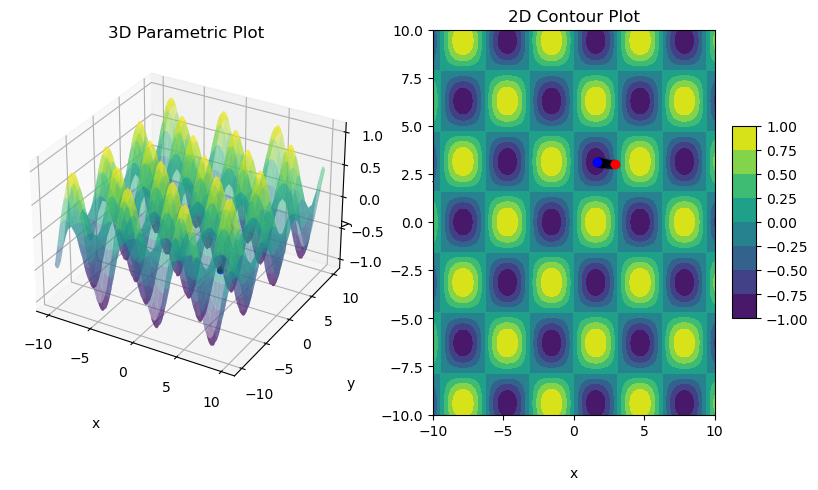

In [7]:
# Perform gradient descent and plot the results
start_xy = [3, 3]
learning_rate = 0.1
num_iterations = 1000
indepvar_opt, f_opt, history = gradient_descent_estimated(start_xy, learning_rate, num_iterations)



# Create Plots
fig= plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')
ax.scatter(*zip(*history), c='k', marker='o', s=5)
ax.scatter(*history[0], c='r', marker='o')
ax.scatter(*history[len(history)-1], c='b', marker='o')

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)

ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= history.shape[0]

for it in range(nit-1):
    plt.scatter(history[it,0], history[it,1], c='k', alpha=0.2)

plt.scatter(history[0,0], history[0,1] , c='r') # init
plt.scatter(history[nit-1,0], history[nit-1,1] , c='b') # end

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()

#### Gradient descent  scipy.optimize:

We will use scipy.optimize library to obtain the minimum of our function

- To do: implement the function `scipy.optimize.fmin` to obtain the value of 'indepvar' that minimizes the function f(indepvar)

Check the documentation:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html

In [8]:
import scipy.optimize

start_xy = [3, 3]
[indepvar_opt, indepvar_all] = scipy.optimize.fmin(f, x0=start_xy, retall=True)

Optimization terminated successfully.
         Current function value: -1.000000
         Iterations: 35
         Function evaluations: 68


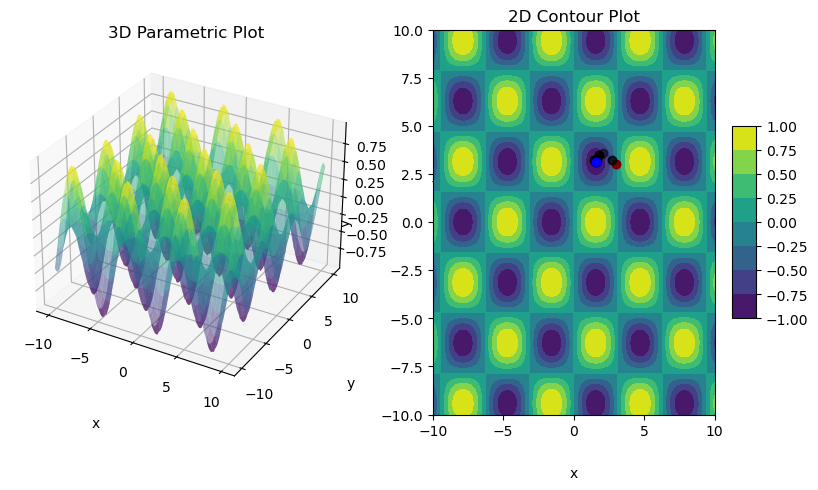

In [9]:
# Create Plots
fig= plt.figure(figsize=(10,5))

# Subplot 1: 3D Parametric Plot
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.grid()
surf = ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('viridis'),alpha= 0.5 )
ax.set_title('3D Parametric Plot')

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('f', labelpad=20)


# Subplot 2: 2D Contour Plot
ax = fig.add_subplot(1, 2, 2)
surf = ax.contourf(X, Y, Z, cmap=plt.get_cmap('viridis') )
ax.set_title('2D Contour Plot')
fig.colorbar(surf, shrink=0.5, aspect=8)

nit= history.shape[0]

it=0; plt.scatter(indepvar_all[it][0], indepvar_all[it][1] , c='r') #init

for it in range(nit):
    plt.scatter(indepvar_all[it][0], indepvar_all[it][1],  c='k', alpha=0.5)

plt.scatter(indepvar_all[it][0], indepvar_all[it][1], c='b') #end

ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
plt.show()